In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Линейный дискриминантный анализ

_Априорная вероятность_:

$$
{\rm Pr\,} y
$$

_Апостериорная вероятность_:

$$
{\rm Pr\,}(y \mid x) = \frac{p(x\mid y)\, {\rm Pr\,} y}{p(x)}\ 
$$

Линейный дискриминантный анализ (LDA) делает два предположения:

 - объекты каждого класса распределены по нормальному закону:

$$
p(x\mid y) = \frac{1}{\sqrt{(2\pi)^d\det\Sigma_y}}e^{-\frac{1}{2}(x-\mu_y)^{\top}\Sigma_y^{-1}(x-\mu_y)}
$$

 - матрицы ковариации $\Sigma = \Sigma_y$ одинаковы для всех классов
 
 
Нам нужно сравнить две апостериорные вероятности:

$$
{\rm Pr\,}(y \mid x) > {\rm Pr\,}(y' \mid x)
$$

Подставляя выражения для $p(x\mid y)$ и $p(x\mid y')$ и логарифмируя, приходим к неравенству:

$$
{-\frac{1}{2}(x-\mu_y)^{\top}\Sigma^{-1}(x-\mu_y)} + \ln {\rm Pr\,} y
>
{-\frac{1}{2}(x-\mu_{y'})^{\top}\Sigma^{-1}(x-\mu_{y'})} + \ln {\rm Pr\,} y'
$$

Откуда

$$
(\mu_y - \mu_{y'})^{\top} \Sigma^{-1} x >
\frac{1}{2}\mu_{y}^{\top}\Sigma^{-1}\mu_{y} - \frac{1}{2}\mu_{y'}^{\top}\Sigma^{-1}\mu_{y'}
- \ln {\rm Pr\,} y+ \ln {\rm Pr\,} y'
$$
т. е.
$$
w^{\top} x > c,
$$
где $w = (\mu_y - \mu_{y'})^{\top} \Sigma^{-1}$, а $c$ – некоторая константа.

Таким образом, 

* уравнение $w^{\top} x = c$ задает разделяющую гиперплоскость между классами $y$ и $y'$
* важна линейная комбинация признаков $x$ с коэффициентами $w$

Введем _линейную дискриминантную функцию_:
$$
\delta_y(x) = 
- \frac{1}{2}(x-\mu_y)^{\top}\Sigma^{-1}(x-\mu_y) + \frac{1}{2}x^{\top}\Sigma^{-1}x + \ln {\rm Pr}\,y
= \mu_y^{\top} \Sigma^{-1} x  - \frac{1}{2}\mu_y^{\top}\Sigma^{-1}\mu_y + \ln {\rm Pr}\,y
$$

Классификатор: объект $x$ относим к тому классу $y$, для которого $\delta_y(x)$ максимальна.

Здесь 
$$
\rho(x,x') = \sqrt{(x-x')^{\top}\Sigma^{-1}(x-x')}
$$
– это _расстояние Махаланобиса_.


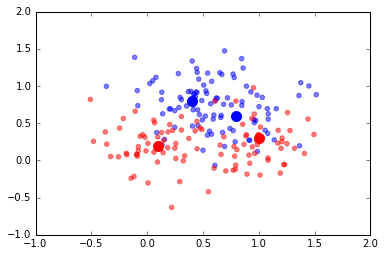

In [2]:
import mysk

X, y = mysk.generate_points(seed = 0)
mysk.draw_points(X, y)
mysk.draw_centers()

In [3]:
X_test, y_test = mysk.generate_points(seed = 1)

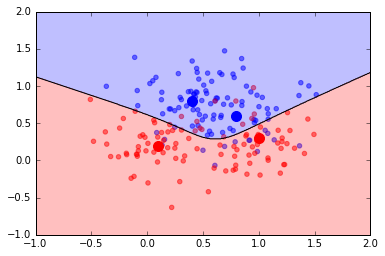

In [4]:
mysk.draw_points(X, y)
mysk.draw_centers()
mysk.draw_bayes_sep_curve()

In [5]:
from sklearn import discriminant_analysis
lda_model = discriminant_analysis.LinearDiscriminantAnalysis()
lda_model.fit(X, y)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

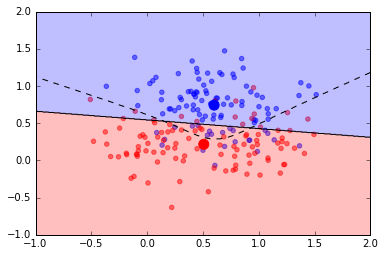

In [6]:
mysk.draw_points(X, y)
mysk.draw_sep_curve(lda_model)
mysk.draw_bayes()
plt.scatter(lda_model.means_[:, 0], lda_model.means_[:, 1], color = ['b', 'r'], s = 100)

In [7]:
lda_model.means_

array([[ 0.5997127 ,  0.7428336 ],
       [ 0.5070765 ,  0.21611481]])

In [8]:
err_train = np.mean(y != lda_model.predict(X))
err_test = np.mean(y_test != lda_model.predict(X_test))
print err_train, err_test

0.195 0.225


In [14]:
print lda_model.priors_
print lda_model.covariance_

[ 0.5  0.5]


AttributeError: 'LinearDiscriminantAnalysis' object has no attribute 'covariance_'

In [15]:
print lda_model.coef_

[[-0.69581992 -5.96084611]]


In [18]:
print lda_model.predict_proba([[0.5, 0]])

[[ 0.05239011  0.94760989]]


## Расширяем пространство признаков

In [19]:
X_ext = np.hstack([X, X[:, 0:1]**2, X[:, 0:1]*X[:, 1:2], X[:, 1:2]**2])
lda_model.fit(X_ext, y)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [20]:
class LDA_ext(lda.LDA):
    def __init__(self):
        super(LDA_ext, self).__init__() #lda.LDA.__init__(self)
    def fit(self, X, y):
        return lda.LDA.fit(self, np.hstack([X, X[:, 0:1]**2, X[:, 0:1]*X[:, 1:2], X[:, 1:2]**2]), y)
    def predict(self, X):
        return lda.LDA.predict(self, np.hstack([X, X[:, 0:1]**2, X[:, 0:1]*X[:, 1:2], X[:, 1:2]**2]))

NameError: name 'lda' is not defined

In [21]:
lda_ext_model = LDA_ext()
lda_ext_model.fit(X, y)
mysk.draw_points(X, y)
mysk.draw_sep_curve(lda_ext_model)
mysk.draw_bayes()

NameError: name 'LDA_ext' is not defined

In [22]:
err_train = np.mean(y != lda_ext_model.predict(X))
err_test = np.mean(y_test != lda_ext_model.predict(X_test))
print err_train, err_test

NameError: name 'lda_ext_model' is not defined

## Квадратичный дискриминантный анализ

In [24]:
qda = discriminant_analysis.QuadraticDiscriminantAnalysis()
qda.fit(X, y)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariances=False, tol=0.0001)

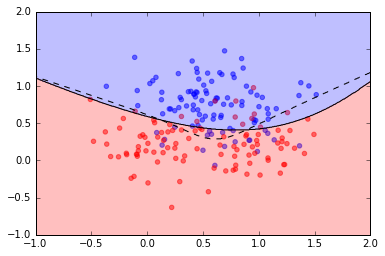

In [25]:
mysk.draw_points(X, y)
mysk.draw_sep_curve(qda)
mysk.draw_bayes()

In [26]:
err_train = np.mean(y != qda.predict(X))
err_test = np.mean(y_test != qda.predict(X_test))
print err_train, err_test

0.16 0.205


## LDA как метод понижения размерности

Рассмотрим отношение _межклассовой дисперсии_ к _внутриклассовой дисперсии_ для линейной комбинации признаков $w^{\top}x$:
$$
S = \frac{w^{\top}\Sigma'w}{w^{\top}\Sigma w},
$$
где
$$
\Sigma = \frac{1}{N-K} \sum_{k=1}^K \sum_{y^{(i)}=k} (x^{(i)} - \mu_k) (x^{(i)} - \mu_k)^{\top}
$$
– эмпирическая матрица ковариаций;
$$
\Sigma' = \frac{1}{K} \sum_{k=1}^K (\mu_k - \mu) (\mu_k - \mu)^{\top}
$$
– матрица ковариаций средних, $\mu$ – матожидание средних.

Максимум величины $S$ достигается на векторе $w$

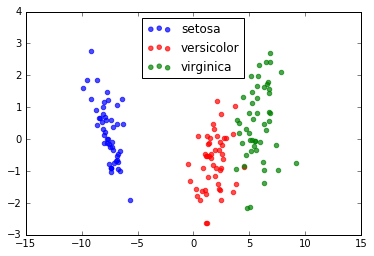

In [33]:
from sklearn import datasets
iris = datasets.load_iris()

X = iris.data
y = iris.target
names = iris.target_names

lda_model = discriminant_analysis.LinearDiscriminantAnalysis(n_components = 2)
lda_model.fit(X, y)
X_lda = lda_model.transform(X)

plt.scatter(X_lda[y == 0, 0], X_lda[y == 0, 1], color = 'b', label = names[0], alpha = 0.7)
plt.scatter(X_lda[y == 1, 0], X_lda[y == 1, 1], color = 'r', label = names[1], alpha = 0.7)
plt.scatter(X_lda[y == 2, 0], X_lda[y == 2, 1], color = 'g', label = names[2], alpha = 0.7)

plt.legend(loc = 9)

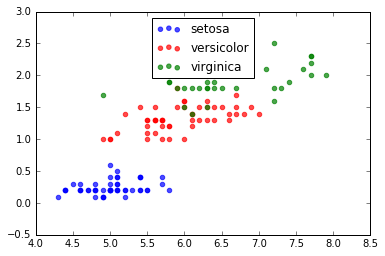

In [36]:
plt.scatter(X[y == 0, 0], X[y == 0, 3], color = 'b', label = names[0], alpha = 0.7)
plt.scatter(X[y == 1, 0], X[y == 1, 3], color = 'r', label = names[1], alpha = 0.7)
plt.scatter(X[y == 2, 0], X[y == 2, 3], color = 'g', label = names[2], alpha = 0.7)

plt.legend(loc = 9)